In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


1. Import Library

In [3]:
from datetime import datetime, timedelta
from dateutil import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from datetime import datetime
import requests
import tensorflow as tf
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

2. Import Data

In [4]:
df=pd.read_csv('O3 Validation No Interpolate.csv')
df

,created_at,O3,entry_id,jam,bagianset,flag
0,2023-06-01 00:00:00,20.0,1,0,0.1,1.1
1,2023-06-01 00:02:00,20.0,1,0,0.1,1.1
2,2023-06-01 00:04:00,20.0,1,0,0.1,1.1
3,2023-06-01 00:06:00,20.0,1,0,0.1,1.1
4,2023-06-01 00:10:00,20.0,1,0,0.1,1.1
...,...,...,...,...,...,...
6294,2023-06-16 15:50:00,20.0,16,15,0.2,16.2
6295,2023-06-16 15:52:00,20.0,16,15,0.2,16.2
6296,2023-06-16 15:54:00,20.0,16,15,0.2,16.2
6297,2023-06-16 15:56:00,20.0,16,15,0.2,16.2


3. Feature Selection

In [5]:
index_list = [5675]  # Indeks yang ingin ditampilkan
df_filtered = df.iloc[index_list]

# Menampilkan DataFrame hasil filter
print(df_filtered)

               created_at    O3  entry_id  jam  bagianset  flag
5675  2023-06-15 00:00:00  20.0        15    0        0.1  15.1


In [6]:
df = df.drop(df.index[5676:6299])
df

,created_at,O3,entry_id,jam,bagianset,flag
0,2023-06-01 00:00:00,20.0,1,0,0.1,1.1
1,2023-06-01 00:02:00,20.0,1,0,0.1,1.1
2,2023-06-01 00:04:00,20.0,1,0,0.1,1.1
3,2023-06-01 00:06:00,20.0,1,0,0.1,1.1
4,2023-06-01 00:10:00,20.0,1,0,0.1,1.1
...,...,...,...,...,...,...
5671,2023-06-14 23:52:00,20.0,14,23,0.3,14.3
5672,2023-06-14 23:54:00,20.0,14,23,0.3,14.3
5673,2023-06-14 23:56:00,20.0,14,23,0.3,14.3
5674,2023-06-14 23:58:00,20.0,14,23,0.3,14.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  5676 non-null   object 
 1   O3          5676 non-null   float64
 2   entry_id    5676 non-null   int64  
 3   jam         5676 non-null   int64  
 4   bagianset   5676 non-null   float64
 5   flag        5676 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 266.2+ KB


In [8]:
df.describe()

,O3,entry_id,jam,bagianset,flag
count,5676.000000,5676.000000,5676.000000,5676.000000,5676.000000
mean,24.297569,7.145173,13.051621,0.220789,7.365962
std,8.914320,4.010655,6.049369,0.070924,4.013516
min,19.000000,1.000000,0.000000,0.100000,1.100000
25%,20.000000,4.000000,9.000000,0.200000,4.200000
50%,20.000000,7.000000,13.000000,0.200000,7.300000
75%,25.000000,10.000000,18.000000,0.300000,10.300000
max,102.000000,15.000000,23.000000,0.300000,15.100000


In [9]:
df['DateTime']=df['created_at'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  5676 non-null   object        
 1   O3          5676 non-null   float64       
 2   entry_id    5676 non-null   int64         
 3   jam         5676 non-null   int64         
 4   bagianset   5676 non-null   float64       
 5   flag        5676 non-null   float64       
 6   DateTime    5676 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 310.5+ KB


In [10]:
df = df[['DateTime', 'O3']]
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index(df['DateTime'],inplace=True)
df.drop(columns='DateTime', axis=1, inplace=True)
df

C:\Users\Tania Christiana A\AppData\Local\Temp\ipykernel_11904\3980012392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['DateTime'])
C:\Users\Tania Christiana A\AppData\Local\Temp\ipykernel_11904\3980012392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='DateTime', axis=1, inplace=True)


,O3
DateTime,
2023-06-01 00:00:00,20.0
2023-06-01 00:02:00,20.0
2023-06-01 00:04:00,20.0
2023-06-01 00:06:00,20.0
2023-06-01 00:10:00,20.0
...,...
2023-06-14 23:52:00,20.0
2023-06-14 23:54:00,20.0
2023-06-14 23:56:00,20.0


In [11]:
df.to_csv('data_valid O3 1-14Juni.csv')

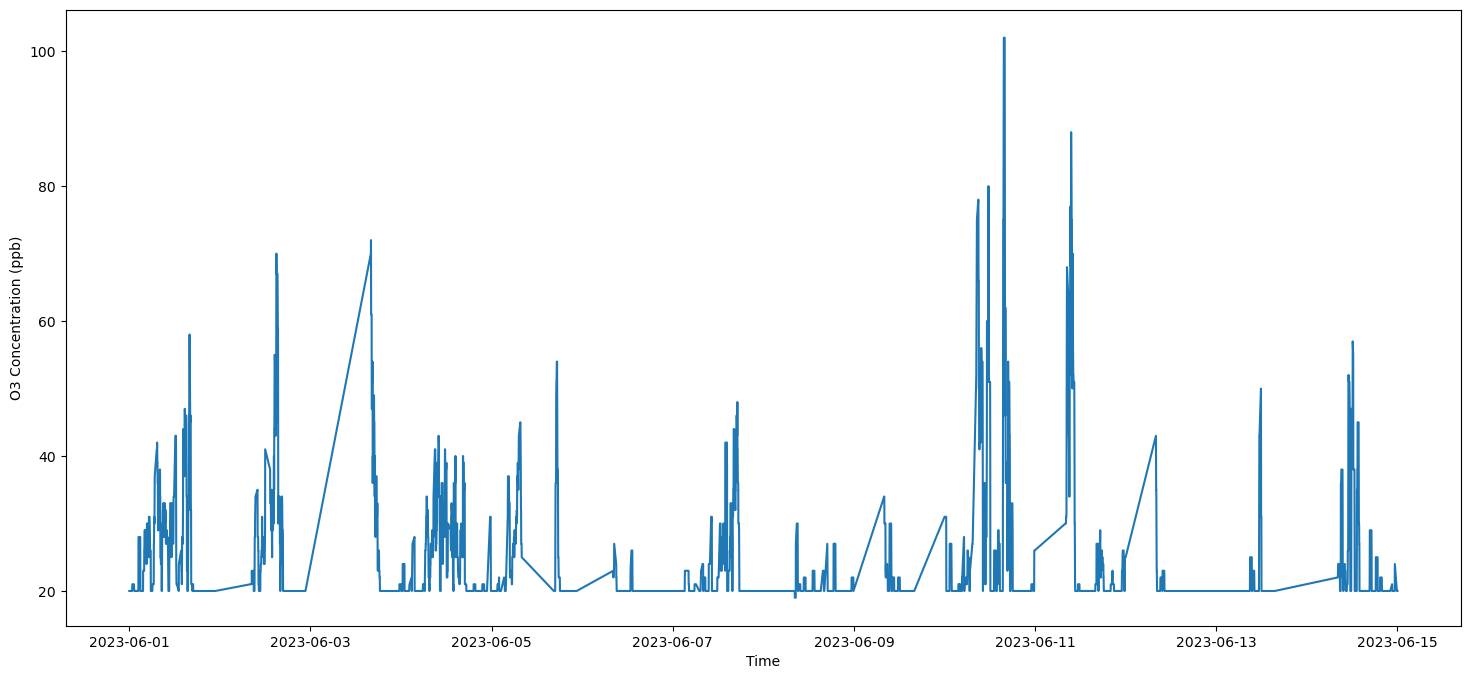

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(df['O3'])
plt.xlabel('Time')
plt.ylabel('O3 Concentration (ppb)')
plt.grid(False)
plt.show()

4. Preprocessing & Dataset Splitting

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.01204819],
       [0.01204819],
       [0.01204819],
       ...,
       [0.01204819],
       [0.01204819],
       [0.01204819]])

5. Train Split Function

In [14]:
def train_split(dataframe, split):
  data_array = dataframe
  training_len = int(np.ceil(len(data_array)*split))
  scaled_data = data_array

  train_data = scaled_data[0:int(training_len), :]
  X_train = []
  y_train = []
  for i in range(30, len(train_data)):
      X_train.append(train_data[i-30:i, 0])
      y_train.append(train_data[i, 0])

  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  return X_train, y_train, training_len, scaled_data, data_array

In [15]:
X_train_70, y_train_70, training_len_70, scaled_data, data_array = train_split(dataframe=scaled_data, split=.70)

In [16]:
X_train_70.shape

(3944, 30, 1)

6. Architecture Model

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False, input_shape = (X_train_70.shape[1], 1)),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(lr=1e-6)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(X_train_70, y_train_70, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
124/124 [==============================] - 6s 15ms/step - loss: 0.0091 - mae: 0.0779 - lr: 1.0000e-06
Epoch 2/100
124/124 [==============================] - 2s 16ms/step - loss: 0.0090 - mae: 0.0764 - lr: 1.1220e-06
Epoch 3/100
124/124 [==============================] - 2s 15ms/step - loss: 0.0088 - mae: 0.0748 - lr: 1.2589e-06
Epoch 4/100
124/124 [==============================] - 2s 15ms/step - loss: 0.0086 - mae: 0.0732 - lr: 1.4125e-06
Epoch 5/100
124/124 [==============================] - 2s 14ms/step - loss: 0.0084 - mae: 0.0716 - lr: 1.5849e-06
Epoch 6/100
124/124 [==============================] - 2s 15ms/step - loss: 0.0082 - mae: 0.0700 - lr: 1.7783e-06
Epoch 7/100
124/124 [==============================] - 2s 17ms/step - loss: 0.0080 - mae: 0.0683 - lr: 1.9953e-06
Epoch 8/100
124/124 [==============================] - 2s 16ms/step - loss: 0.0078 - mae: 0.0663 - lr: 2.2387e-06
Epoch 9/100
124/124 [==============================] - 2s 16ms/step - loss: 0.0076 - mae

7. Testing Dataset

In [18]:
def test_split(training_len, scaled_data):
  scaled_data = scaled_data
  test_data = scaled_data[training_len - 30:, :]

  X_test = []
  y_test = data_array[training_len:, :]
  for i in range(30, len(test_data)):
    X_test.append(test_data[i-30:i, 0])

  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  return X_test, y_test, test_data

In [19]:
X_test_30, y_test_30, test_data_30 = test_split(training_len_70, scaled_data)

In [20]:
X_test_30.shape

(1702, 30, 1)

8. Model predicting

In [21]:
def predict(X_test, model):
  predictions = model.predict(X_test)
  predictions

  return predictions

In [22]:
predictions_30 = predict(X_test_30, model)
predictions_30

54/54 [==============================] - 2s 7ms/step


array([[0.53065133],
       [0.5217598 ],
       [0.5147095 ],
       ...,
       [0.01561224],
       [0.01561224],
       [0.01561224]], dtype=float32)

In [23]:
predictions_inverse_30 = scaler.inverse_transform(predictions_30)
predictions_inverse_30

array([[63.044064],
       [62.306065],
       [61.72089 ],
       ...,
       [20.295816],
       [20.295816],
       [20.295816]], dtype=float32)

9. Model Evaluate

In [24]:
var=explained_variance_score(y_test_30, predictions_30)
mae=mean_absolute_error(y_test_30, predictions_30)
mse=mean_squared_error (y_test_30, predictions_30)
rmse=np.sqrt(mse)
r2=r2_score(y_test_30, predictions_30)
metric=[var,mae,mse,rmse,r2]
evaluate=['Explained variance','MAE','MSE','RMSE','R^2']
performance_evaluate=pd.DataFrame([evaluate,metric])
performance_evaluate

,0,1,2,3,4
0,Explained variance,MAE,MSE,RMSE,R^2
1,0.923715,0.015541,0.001423,0.037725,0.923693


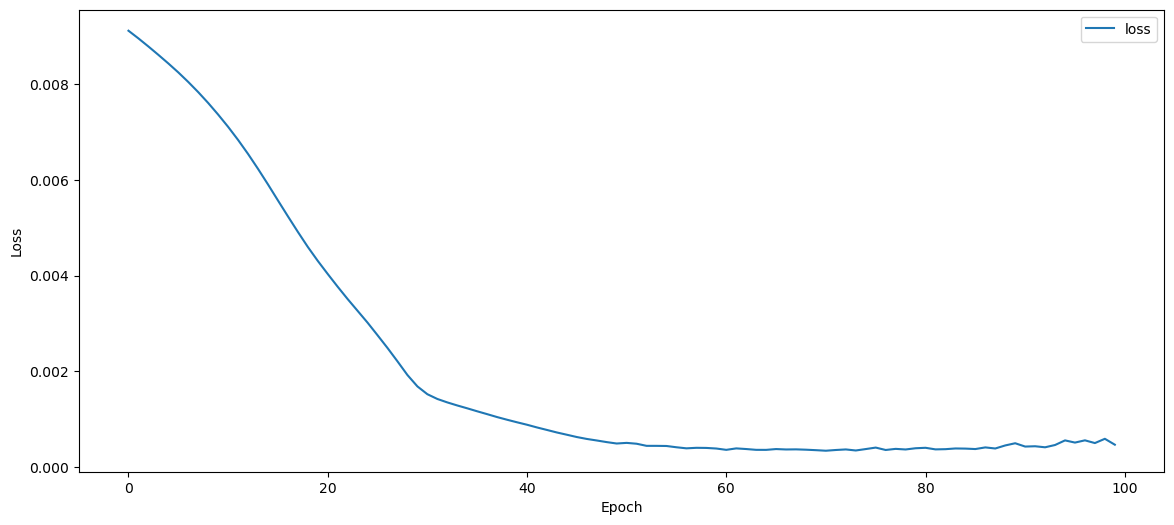

In [25]:
plt.figure(figsize=(14,6))
plt.plot(history.history["loss"], label="loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Transform Ndarray to Dataframe

In [26]:
def compare(dataframe, training_len, predictions):
  train = df[:training_len]
  valid = df[training_len:]
  valid['Predictions'] = predictions

  return train, valid

In [27]:
train_70, valid_30 = compare(df, training_len_70, predictions_inverse_30)
valid_30

C:\Users\Tania Christiana A\AppData\Local\Temp\ipykernel_11904\3067466912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,O3,Predictions
DateTime,,
2023-06-10 11:22:00,60.0,63.044064
2023-06-10 11:24:00,60.0,62.306065
2023-06-10 11:26:00,58.0,61.720890
2023-06-10 11:28:00,51.0,59.894169
2023-06-10 11:30:00,51.0,53.912663
...,...,...
2023-06-14 23:52:00,20.0,20.295816
2023-06-14 23:54:00,20.0,20.295816
2023-06-14 23:56:00,20.0,20.295816


In [28]:
valid_30.to_csv('data_predicted LSTM.csv')

In [29]:
valid_30.tail()

,O3,Predictions
DateTime,,
2023-06-14 23:52:00,20.0,20.295816
2023-06-14 23:54:00,20.0,20.295816
2023-06-14 23:56:00,20.0,20.295816
2023-06-14 23:58:00,20.0,20.295816
2023-06-15 00:00:00,20.0,20.295816


In [30]:
def plot_predict(train, valid):
  plot = plt.figure(figsize=(17, 7))
  plot = plt.plot(train['O3'], label = "Traning", c = "b")
  plot = plt.plot(valid['O3'], label = "Validation", c = "g")
  plot = plt.plot(valid['Predictions'], label = "Predict", c = "r")
  plot = plt.legend()
  plot = plt.show()

  return plot

In [31]:
valid_30['LSTM'] = valid_30['Predictions']
valid_30.drop(columns='LSTM',inplace=True)

C:\Users\Tania Christiana A\AppData\Local\Temp\ipykernel_11904\1642496669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_30['LSTM'] = valid_30['Predictions']
C:\Users\Tania Christiana A\AppData\Local\Temp\ipykernel_11904\1642496669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_30.drop(columns='LSTM',inplace=True)


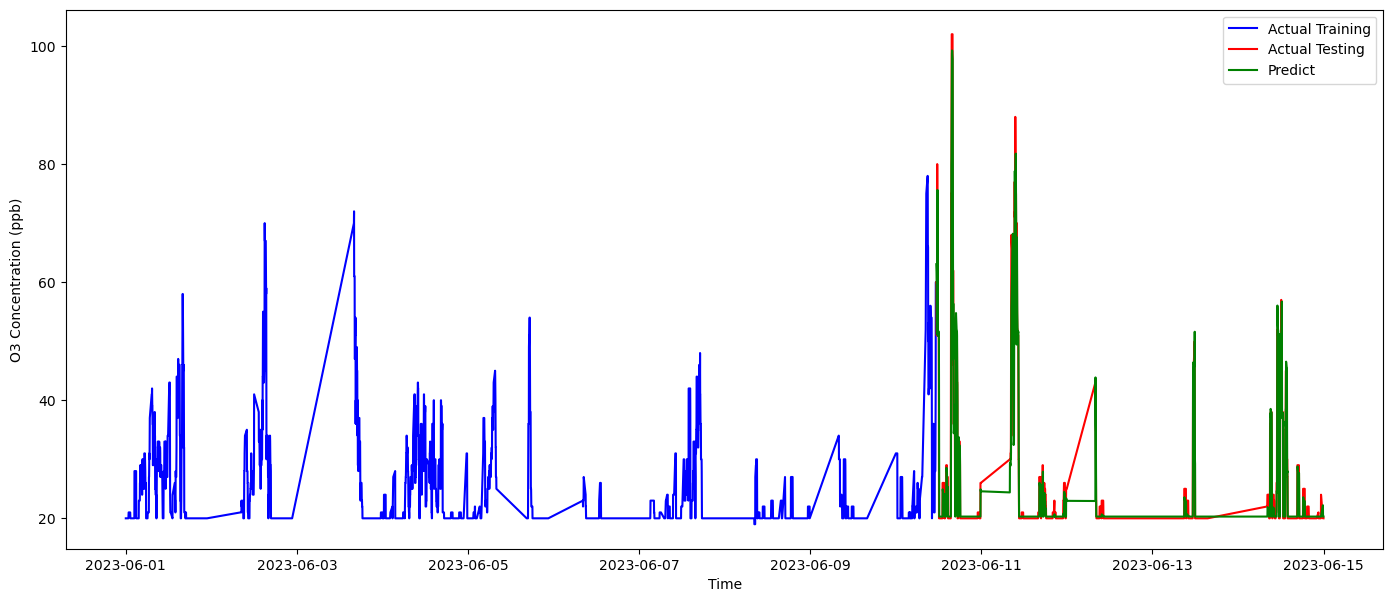

In [32]:
plot = plt.figure(figsize=(17, 7))
plot = plt.plot(train_70['O3'], label = "Actual Training", c = "b")
plot = plt.plot(valid_30['O3'], label = "Actual Testing", c = "r")
plot = plt.plot(valid_30['Predictions'], label = "Predict", c = "g")
plt.xlabel('Time')
plt.ylabel('O3 Concentration (ppb)')
plot = plt.legend()
plot = plt.show()

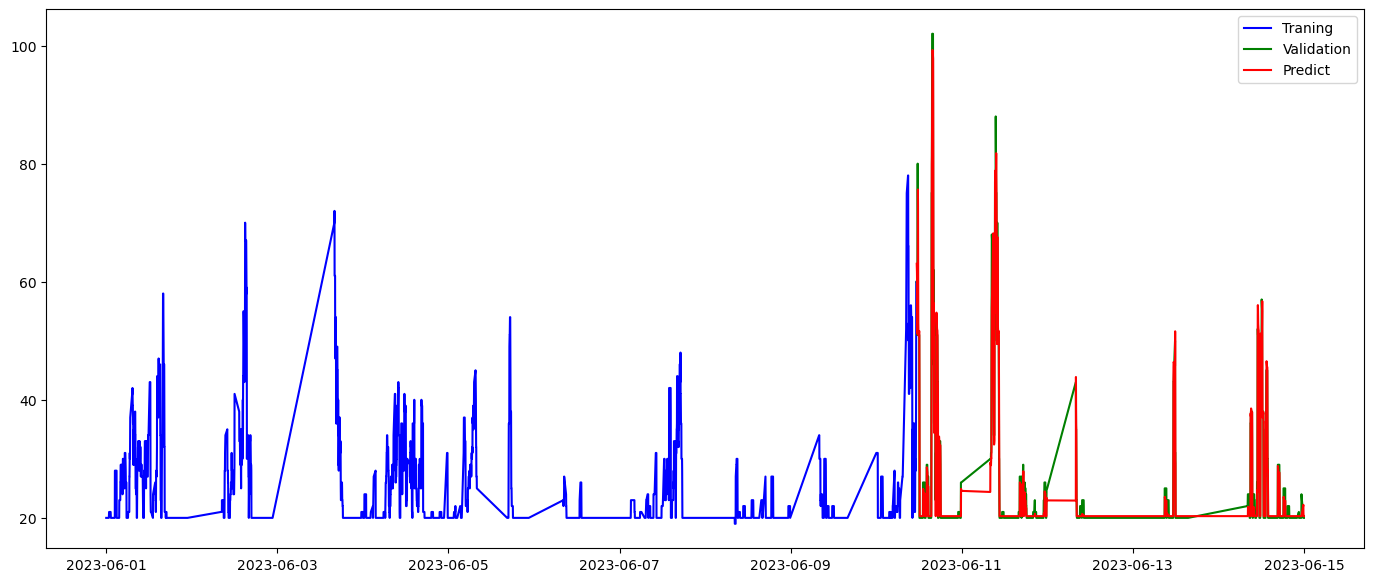

In [33]:
plot_predict_70_30 = plot_predict(train_70, valid_30)
plot_predict_70_30

In [44]:
forecast = pd.DataFrame({'DateTime': pd.date_range(start='2023/06/15 00:02:00', end='2023/06/15 01:00:00', freq='2Min')})
slot = 30
inputs = test_data_30[len(test_data_30)-slot:]

for i in range(slot, len(forecast)):
    inputs = inputs.T
    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
    predictions_30 = model.predict(inputs[:, i-slot:i])
    inputs = np.append(inputs, predictions_30)
    inputs = np.reshape(inputs, (inputs.shape[0], 1))

forecast['O3'] = inputs[:len(forecast)]
forecast = forecast.set_index('DateTime')

In [35]:
forecast.shape

(2160, 1)

In [45]:
forecast.head()

,O3
DateTime,
2023-06-15 00:02:00,0.012048
2023-06-15 00:04:00,0.024096
2023-06-15 00:06:00,0.012048
2023-06-15 00:08:00,0.012048
2023-06-15 00:10:00,0.012048


In [46]:
forecast.tail()

,O3
DateTime,
2023-06-15 00:52:00,0.012048
2023-06-15 00:54:00,0.012048
2023-06-15 00:56:00,0.012048
2023-06-15 00:58:00,0.012048
2023-06-15 01:00:00,0.012048


In [47]:
forecast_inverse=scaler.inverse_transform(forecast)
forecast_inverse=forecast_inverse.reshape((-1))

In [48]:
forecast['O3']=forecast_inverse

In [40]:
forecast.head(10)

,O3
DateTime,
2023-06-15 00:02:00,20.0
2023-06-15 00:04:00,21.0
2023-06-15 00:06:00,20.0
2023-06-15 00:08:00,20.0
2023-06-15 00:10:00,20.0
2023-06-15 00:12:00,20.0
2023-06-15 00:14:00,20.0
2023-06-15 00:16:00,20.0
2023-06-15 00:18:00,20.0


In [49]:
forecast.tail(20)

,O3
DateTime,
2023-06-15 00:22:00,20.0
2023-06-15 00:24:00,20.0
2023-06-15 00:26:00,20.0
2023-06-15 00:28:00,20.0
2023-06-15 00:30:00,20.0
2023-06-15 00:32:00,20.0
2023-06-15 00:34:00,20.0
2023-06-15 00:36:00,20.0
2023-06-15 00:38:00,20.0


In [52]:
forecast.to_csv('Forecast O3 15 Juni.csv')

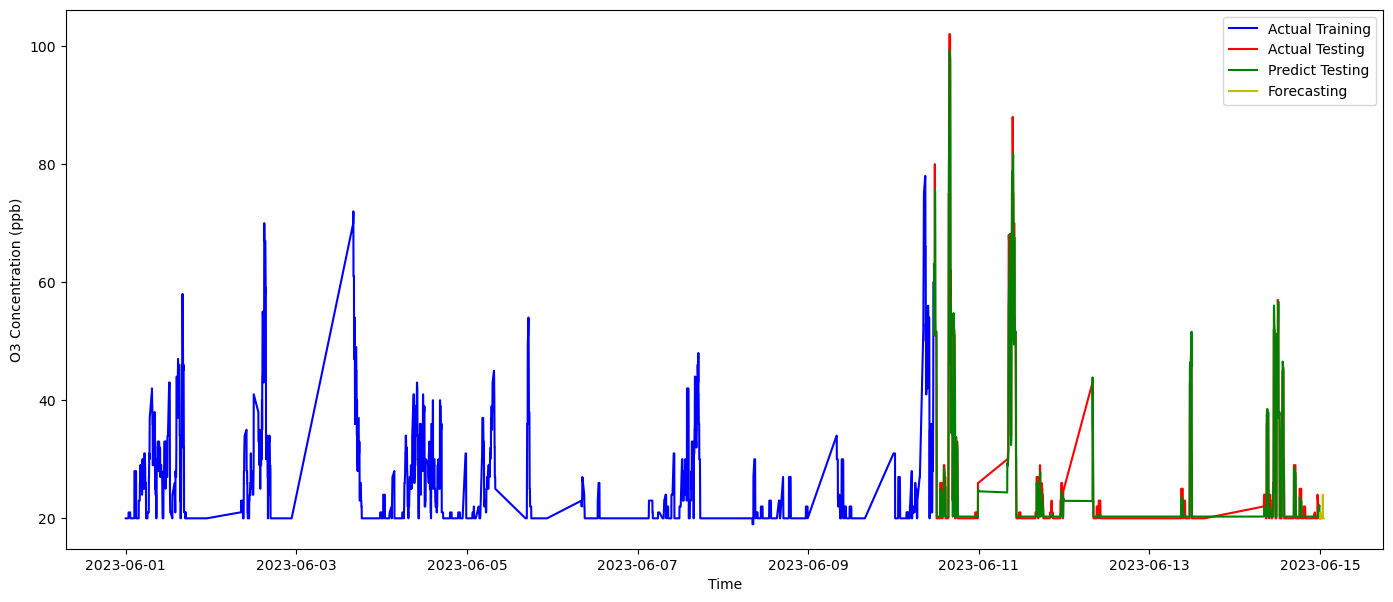

In [54]:
plot = plt.figure(figsize=(17, 7))
plot = plt.plot(train_70['O3'], label = "Actual Training", c = "b")
plot = plt.plot(valid_30['O3'], label = "Actual Testing", c = "r")
plot = plt.plot(valid_30['Predictions'], label = "Predict Testing", c = "g")
plot = plt.plot(forecast['O3'], label = "Forecasting", c = "y")
plt.xlabel('Time')
plt.ylabel('O3 Concentration (ppb)')
plot = plt.legend()
plot = plt.show()